# Bootstrapping a Ibor Curve

Constructing a Ibor curve from a combination of deposits and swaps

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.rates import *

####################################################################
#  FINANCEPY BETA Version 0.350 - This build: 30 Apr 2024 at 21:20 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



In [3]:
value_dt = Date(9, 8, 2019)
spot_days = 2
settle_dt = value_dt.add_days(spot_days)

## Ibor Deposits

In [4]:
dc_type = DayCountTypes.ACT_360

In [5]:
depo1 = IborDeposit(settle_dt, "1M", 0.022009, dc_type)
depo2 = IborDeposit(settle_dt, "2M", 0.022138, dc_type)
depo3 = IborDeposit(settle_dt, "3M", 0.021810, dc_type)
depo4 = IborDeposit(settle_dt, "6M", 0.020503, dc_type)
depo5 = IborDeposit(settle_dt, "12M", 0.019930, dc_type)

In [6]:
depos = [depo1,depo2,depo3,depo4,depo5]

In [7]:
dc_type = DayCountTypes.THIRTY_E_360_ISDA
fixed_freq = FrequencyTypes.SEMI_ANNUAL

## Interest Rate Swaps

In [8]:
dc_type = DayCountTypes.THIRTY_E_360_ISDA
fixed_freq = FrequencyTypes.SEMI_ANNUAL
swap_type = SwapTypes.PAY

In [9]:
swap1 = IborSwap(settle_dt,"2Y",swap_type,0.015910,fixed_freq,dc_type)
swap2 = IborSwap(settle_dt,"3Y",swap_type,0.014990,fixed_freq,dc_type)
swap3 = IborSwap(settle_dt,"4Y",swap_type,0.014725,fixed_freq,dc_type)
swap4 = IborSwap(settle_dt,"5Y",swap_type,0.014640,fixed_freq,dc_type)
swap5 = IborSwap(settle_dt,"6Y",swap_type,0.014800,fixed_freq,dc_type)
swap6 = IborSwap(settle_dt,"7Y",swap_type,0.014995,fixed_freq,dc_type)
swap7 = IborSwap(settle_dt,"8Y",swap_type,0.015180,fixed_freq,dc_type)
swap8 = IborSwap(settle_dt,"9Y",swap_type,0.015610,fixed_freq,dc_type)
swap9 = IborSwap(settle_dt,"10Y",swap_type,0.0159880,fixed_freq,dc_type)
swap10 = IborSwap(settle_dt,"12Y",swap_type,0.016430,fixed_freq,dc_type)

In [10]:
swaps = [swap1,swap2,swap3,swap4,swap5,swap6,swap7,swap8,swap9,swap10]

In [11]:
fras = []

# Bootstrapping The Curve

In [12]:
libor_curve = IborSingleCurve(value_dt, depos, fras, swaps)

Can we show that the Ibor deposits have been repriced at par

In [13]:
for depo in depos:
    v = depo.value(settle_dt, libor_curve)
    print(depo.notional, depo.maturity_dt, v)

100.0 11-AUG-2019 100.0
100.0 11-SEP-2019 100.0
100.0 11-OCT-2019 100.0
100.0 11-NOV-2019 99.99999999999999
100.0 11-FEB-2020 100.00059257211538
100.0 11-AUG-2020 100.0032255497958


In [14]:
for swap in swaps:
    v = swap.value(settle_dt, libor_curve, libor_curve, None)
    print(swap.maturity_dt, v)

11-AUG-2021 -8.786006219452247e-06
11-AUG-2022 -1.18048264994286e-05
11-AUG-2023 -1.3782046153210104e-05
12-AUG-2024 -2.7368601877242327e-05
11-AUG-2025 -4.792520485352725e-05
11-AUG-2026 -5.3168798331171274e-05
11-AUG-2027 -5.586539919022471e-05
11-AUG-2028 3.2014213502407074e-10
13-AUG-2029 -2.0372681319713593e-10
11-AUG-2031 2.9103830456733704e-11


Looks good!

## The Forward Curve

In [15]:
years = np.linspace(0, 15.0, 200)
dates = settle_dt.add_years(years)
fwds = libor_curve.fwd(dates)

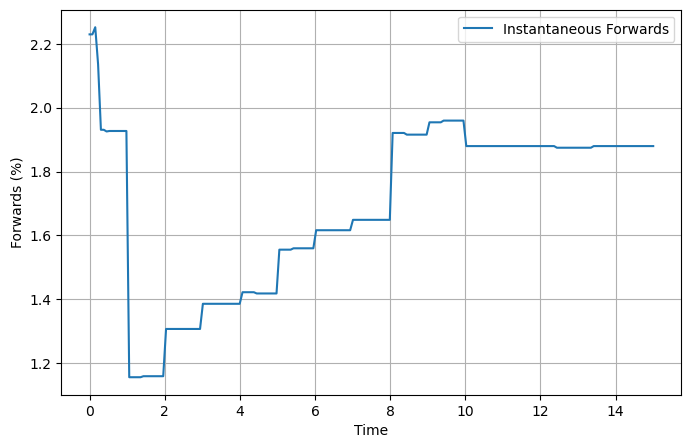

In [16]:
plt.figure(figsize=(8,5))
plt.plot(years,fwds*100, label="Instantaneous Forwards")
plt.xlabel("Time")
plt.ylabel("Forwards (%)")
plt.legend()
plt.grid()

Zoom in one the short end

In [17]:
years = np.linspace(0,1.0,1000)
dates = settle_dt.add_years(years)
fwds = libor_curve.fwd(dates)

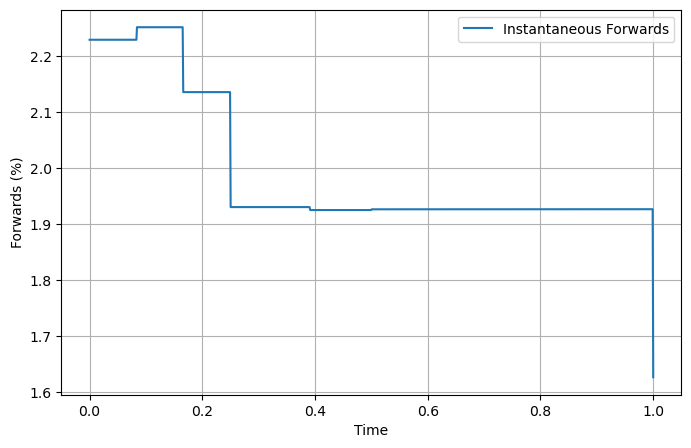

In [18]:
plt.figure(figsize=(8,5))
plt.plot(years,fwds*100, label="Instantaneous Forwards")
plt.xlabel("Time")
plt.ylabel("Forwards (%)")
plt.legend()
plt.grid()

## Extracting the Zero Rate Curves

We choose a range of zero rate frequencies.

In [19]:
years = np.linspace(1/365,5,100)
dates = settle_dt.add_years(years)
zerosC = libor_curve.zero_rate(dates, FrequencyTypes.CONTINUOUS)
zeros1 = libor_curve.zero_rate(dates, FrequencyTypes.ANNUAL)
zeros2 = libor_curve.zero_rate(dates, FrequencyTypes.SEMI_ANNUAL)
zeros4 = libor_curve.zero_rate(dates, FrequencyTypes.QUARTERLY)

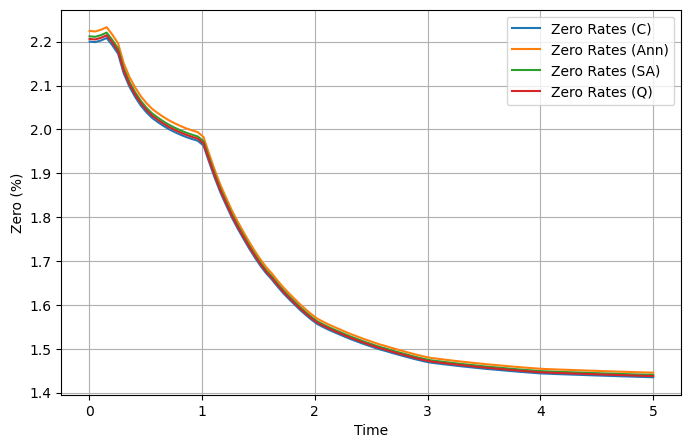

In [20]:
plt.figure(figsize=(8,5))
plt.plot(years,zerosC*100, label="Zero Rates (C)")
plt.plot(years,zeros1*100, label="Zero Rates (Ann)")
plt.plot(years,zeros2*100, label="Zero Rates (SA)")
plt.plot(years,zeros4*100, label="Zero Rates (Q)")
plt.xlabel("Time")
plt.ylabel("Zero (%)")
plt.legend()
plt.grid()

Copyright (c) 2020 Dominic O'Kane